Импортируем необходимые модули для анализа данных

In [6]:
import pandas as pd
import numpy as np

Импортируем модуль для подключения к базе данных

In [7]:
import psycopg

Импортируем модуль для визуализации данных `SeaBorn` и отображения их в `NoteBook`

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Устанавливаем подключение к базе данных

In [9]:
conn = psycopg.connect(dbname="my_db",
                        host="postgresql",
                        user="post_admin",
                        password="post_admin",
                        port="5432")

Выполним запрос, чтобы убедиться что у нас работает подлючение. Выведим первый 10 строк таблицы `orders`

Также полученные запросы из базы данных будем преобразовывать в DataFrame для наглядности вывода данных

In [10]:
pd.read_sql_query("SELECT * FROM orders LIMIT 10", conn)

/tmp/ipykernel_72/1394968148.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pd.read_sql_query("SELECT * FROM orders LIMIT 10", conn)


,order_id,order_date,customer_id,employee_id,shipper_id,product_id,sales,costs,profit,quantity,discount,freight
0,10665,2011-12-07,48,1,3,59,8.03,6.50,1.53,1,0.00,37.60
1,11077,2013-03-02,73,9,2,73,6.11,5.84,0.27,5,0.06,64.93
2,10537,2010-08-11,68,6,1,73,9.36,7.58,1.78,9,0.00,36.46
3,10281,2011-11-10,69,4,1,19,9.90,8.55,1.35,1,0.00,21.86
4,10538,2012-10-12,17,7,2,72,11.58,9.38,2.20,1,0.00,28.79
5,10278,2009-11-09,5,2,2,63,168.16,145.29,22.87,8,0.00,50.46
6,10278,2009-11-09,5,2,2,73,26.75,23.11,3.64,25,0.00,50.46
7,10291,2009-11-24,61,2,2,13,506.66,397.96,108.70,20,46.06,21.08
8,10291,2009-11-24,61,2,2,44,2182.75,1714.45,468.30,24,198.43,21.08
9,10291,2009-11-24,61,2,2,51,234.43,184.14,50.29,2,21.31,21.08


Как мы видим соединение установленно корректно и можно приступать к работе

#### 1. Посмотрим с какой даты с какой у нас начинаются продажи и какая последняя дата продажи

In [11]:
query = """
    SELECT MIN(order_date) AS min_date, MAX(order_date) AS max_date
    FROM orders
"""
pd.read_sql_query(query, conn)

/tmp/ipykernel_72/3278632691.py:5: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pd.read_sql_query(query, conn)


,min_date,max_date
0,2009-07-21,2013-03-29


Как мы видим работа нашего отдел продаж началась `2009-07-21` и последняя продажа была `2013-03-29`

#### 2. Посмотрим вообще сколько у нас было продаж

In [12]:
query = """
    SELECT COUNT(order_id) 
    FROM orders
"""
pd.read_sql_query(query, conn)

/tmp/ipykernel_72/1587899068.py:5: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pd.read_sql_query(query, conn)


,count
0,2172


Окей, значит за все время работы нашего тогового отдела было совершено 2172 продажи

Посмотрим сколько из них уникальных заказов

In [13]:
query = """
    SELECT COUNT(DISTINCT order_id)
    FROM orders
"""
pd.read_sql_query(query, conn)

/tmp/ipykernel_72/2314718465.py:5: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pd.read_sql_query(query, conn)


,count
0,836


Значит за 1 заказ может быть продано несколько позиций и все они относят к одному заказу

#### 3. Посмотрим сколько у нас уникальных покупателей

In [14]:
query = """
    SELECT COUNT(DISTINCT customer_id)
    FROM orders
"""
pd.read_sql_query(query, conn)

/tmp/ipykernel_72/2159200200.py:5: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pd.read_sql_query(query, conn)


,count
0,90


Всего у них 90 уникальных покупателей

#### 4. Посмотрим какая минимальная, средняя, максимальная сумма заказа и построим распределение суммы для каждого товара, для того чтобы понять, как распределены данные

In [15]:
query = """
    SELECT MIN(sales) AS min, AVG(sales) AS mean, MAX(sales) AS max
    FROM orders
"""
pd.read_sql_query(query, conn)

/tmp/ipykernel_72/923888073.py:5: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pd.read_sql_query(query, conn)


,min,mean,max
0,2.12,820.970497,43755.12


Теперь посмотрим на распределение заказов

In [16]:
query = "SELECT sales FROM orders"
data = pd.read_sql_query(query, conn)

/tmp/ipykernel_72/2367719478.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data = pd.read_sql_query(query, conn)


<Axes: ylabel='Count'>

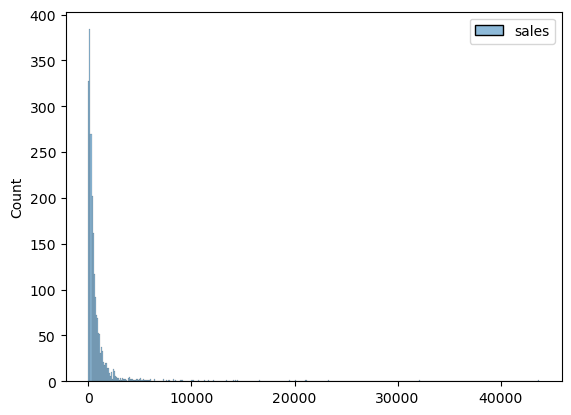

In [17]:
sns.histplot(data)

Как мы видим гистрограмма не отображает корректно наше расределение, т.к. основное количество покупок на сумму от `2$` до `~3000$`, то построим `ящик с усам`

<Axes: >

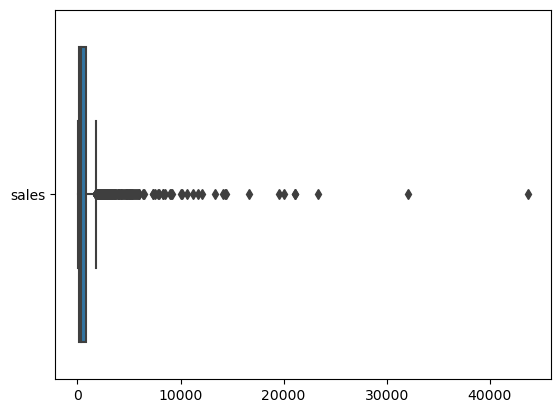

In [18]:
sns.boxplot(data, orient="h")

Как мы видим имеется большое кличество выбросов с аномальными суммами

Посмотрим на эти заказы и определим какие категории товаров так продаются

In [19]:
query = """
    SELECT order_id, category, sales
    FROM orders LEFT JOIN products ON orders.product_id=products.products_id
        LEFT JOIN categories ON products.category_id=categories.category_id
    WHERE sales > 10000
"""
data = pd.read_sql_query(query, conn)

/tmp/ipykernel_72/3107851012.py:7: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data = pd.read_sql_query(query, conn)


In [20]:
print(data.sort_values(by="sales", ascending=False))

    order_id        category     sales
12     10991     Womens wear  43755.12
4      10612     Womens wear  32075.20
11     10961     Womens wear  23334.60
16     11050     Womens wear  21109.55
17     10808     Womens wear  21077.20
1      10475     Womens wear  20042.09
0      10530     Womens wear  19557.50
15     10962     Womens wear  16628.48
8      10701     Womens wear  14456.19
7      10273     Womens wear  14281.34
6      10630     Womens wear  14078.05
5      10399     Womens wear  13366.85
3      10319     Womens wear  12119.10
9      10776  Men´s Footwear  11665.08
2      10569     Womens wear  11229.90
14     10897  Men´s Footwear  10652.00
10     10837     Womens wear  10140.90
13     11030  Men´s Footwear  10074.75


Как мы видим, что ТОП продаж занимается женская одежда

#### 5. Посмотрим на распределение количества товаров в заказе

In [21]:
query = """
    SELECT SUM(quantity) AS sum_q
    FROM orders
    GROUP BY order_id
"""
data = pd.read_sql_query(query, conn)

/tmp/ipykernel_72/969116723.py:6: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data = pd.read_sql_query(query, conn)


Теперь посмотрим на распределение количества товаров по заказам

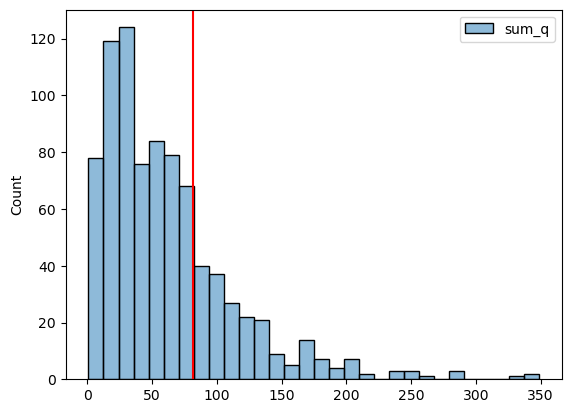

In [22]:
q75 = np.quantile(data, 0.75)

graph = sns.histplot(data)
graph.axvline(q75, color="r")
plt.show()

Как мы видим в 75% заказов количество товаров от 1 до 80 единиц

#### 6. Посмотрим как распределены скидки на наши товары

In [23]:
query = """
    SELECT discount
    FROM orders
"""
data = pd.read_sql_query(query, conn)

/tmp/ipykernel_72/3562021407.py:5: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data = pd.read_sql_query(query, conn)


<Axes: ylabel='Count'>

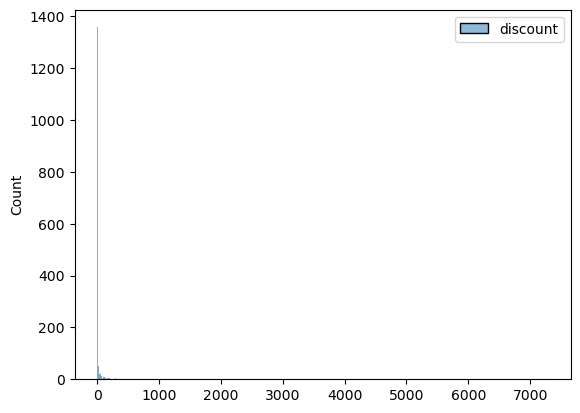

In [24]:
sns.histplot(data)

График не корректно отображает скидки, т.к. большая часть скидок сконцентрирована около `~10$`, выполним построение `ящика с усами`

<Axes: >

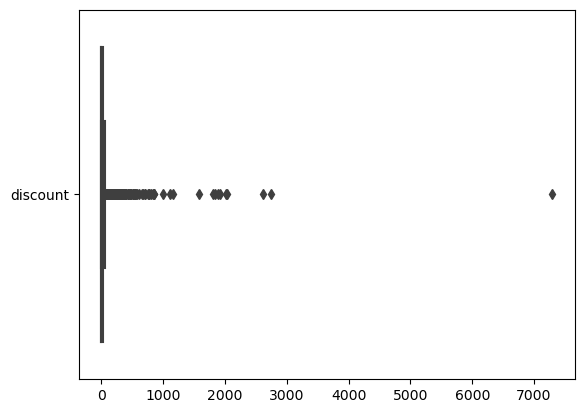

In [25]:
sns.boxplot(data, orient="h")

Как мы видим есть аномальные скидки на товары, но более всего заметна скидка более 7000`$`

Определим этот заказ и товар и категорию, на который была предоставлена максимальная скидка

In [26]:
query = """
    SELECT order_id, product, category, discount
    FROM orders LEFT JOIN products ON orders.product_id=products.products_id
        LEFT JOIN categories ON products.category_id=categories.category_id
    WHERE discount = (SELECT MAX(discount) FROM orders)
"""
pd.read_sql_query(query, conn)

/tmp/ipykernel_72/2112987612.py:7: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pd.read_sql_query(query, conn)


,order_id,product,category,discount
0,10991,Minnki Pälsii,Womens wear,7292.52


Как мы видим категория относится к женской одежде, проверим, связана ли эта скидка на самую большую покупку

In [27]:
query = """
    SELECT discount, sales,
        CASE
            WHEN sales = (SELECT MAX(sales) FROM orders)
            THEN 1 ELSE 0
        END AS flag
    FROM orders
    WHERE order_id=10991 
"""
pd.read_sql_query(query, conn)

/tmp/ipykernel_72/702817397.py:10: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pd.read_sql_query(query, conn)


,discount,sales,flag
0,180.80,1084.80,0
1,119.36,716.16,0
2,7292.52,43755.12,1


Да, наше предположение подтвердилось!

#### 7. Выведем продажи по кварталам и годам

In [30]:
query = """
    SELECT EXTRACT(YEAR FROM order_date) AS Year,EXTRACT(QUARTER FROM order_date) AS Quarter, SUM(sales)
    FROM orders
    GROUP BY EXTRACT(YEAR FROM order_date), EXTRACT(QUARTER FROM order_date)
    ORDER BY 1 ASC, 2 ASC
"""
data = pd.read_sql_query(query, conn)

/tmp/ipykernel_72/1959352242.py:7: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data = pd.read_sql_query(query, conn)


In [31]:
print(data)

      year  quarter        sum
0   2009.0      3.0    6847.86
1   2009.0      4.0    9045.76
2   2010.0      1.0   50065.74
3   2010.0      2.0   68423.47
4   2010.0      3.0   90102.28
5   2010.0      4.0   44952.70
6   2011.0      1.0  140564.70
7   2011.0      2.0  108707.39
8   2011.0      3.0  128993.42
9   2011.0      4.0  135753.78
10  2012.0      1.0  224965.41
11  2012.0      2.0  249014.49
12  2012.0      3.0  203452.82
13  2012.0      4.0  175126.24
14  2013.0      1.0  147131.86


Выполним визуализацию данных

[Text(0.5, 0, 'year'), Text(0, 0.5, 'sales')]

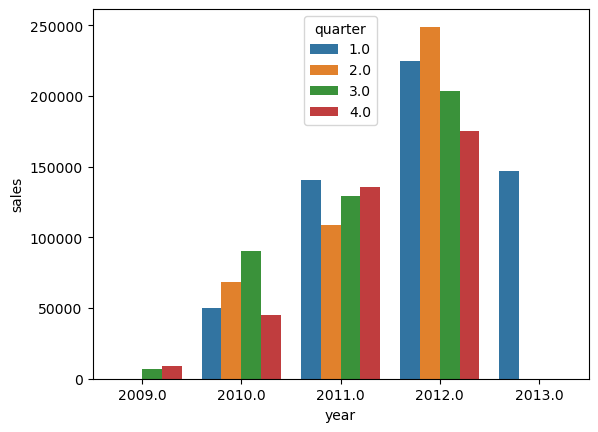

In [36]:
g = sns.barplot(data=data, x="year", y="sum", hue="quarter")
g.set(xlabel="year", ylabel="sales")

Как мы можем видить, что динамик продаж от года к году растет, однако сделать вывод о сезонности продаж нельзя.

#### 8. Вывести лучшего работника по продажам в разрезе по годам и его продажи

In [38]:
query = """
WITH sales_per_year AS (
  SELECT EXTRACT(YEAR FROM order_date) AS year, employee_name AS name, SUM(sales) AS sales
  FROM orders LEFT JOIN employees ON orders.employee_id = employees.employee_id 
  GROUP BY EXTRACT(YEAR FROM order_date), employee_name
  ORDER BY 1, 3 DESC
),
n_row_sales AS (
  SELECT year, name, sales,
    ROW_NUMBER() OVER(partition by year) AS n_row
  FROM sales_per_year
)

SELECT year, name, sales
FROM n_row_sales
WHERE n_row = 1
"""
pd.read_sql_query(query, conn)

/tmp/ipykernel_72/3380238401.py:18: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pd.read_sql_query(query, conn)


,year,name,sales
0,2009.0,Sien Perslay,9248.96
1,2010.0,Rock Roll,60192.28
2,2011.0,Rob Carsson,135808.71
3,2012.0,Tom Lindwall,160181.80
4,2013.0,Helen Brolin,37982.43


#### 9. Вывести топ 5 категорий и информацию о заказе и товаре, на которые была самая большая скидка


In [39]:
query = """
WITH disconts AS (
  SELECT order_id, order_date, employee_id, product_id, discount, 
    MAX(discount) OVER(partition by produc) AS max_discount
  FROM orders
),
top5_discount AS (
  SELECT order_id, order_date, employee_id, product_id, discount
  FROM disconts
  WHERE discount = max_discount
  ORDER BY 4 DESC
  LIMIT 5
)

SELECT order_id, order_date, employee_name, product, category, discount
FROM top5_discount LEFT JOIN employees USING(employee_id)
  LEFT JOIN products ON top5_discount.product_id = products.products_id
  LEFT JOIN categories ON products.category_id=categories.category_id
ORDER BY 5 DESC
"""
pd.read_sql_query(query, conn)

/tmp/ipykernel_72/2719813932.py:21: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pd.read_sql_query(query, conn)


,order_id,order_date,employee_name,product,category,discount
0,10646,2012-01-23,Rob Carsson,Skirt,Womens wear,115.24
1,10991,2012-06-29,Leif Shine,Minnki Pälsii,Womens wear,7292.52
2,11081,2013-03-13,Rock Roll,Bow tie,Men´s Clothes,105.75
3,10263,2012-10-20,Tom Lindwall,Nikee Running Shoes,Children´s wear,250.83
4,10627,2011-11-07,Tom Lindwall,Mehmet-Napp,Babywear,6.20


#### 10. Вывести количество уникальных покупателей по годам

In [40]:
query = """
SELECT EXTRACT(YEAR FROM order_date) AS Year, COUNT(DISTINCT customer_id)
FROM orders
GROUP BY EXTRACT(YEAR FROM order_date)
"""
pd.read_sql_query(query, conn)

/tmp/ipykernel_72/2121064478.py:6: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pd.read_sql_query(query, conn)


,year,count
0,2009.0,11
1,2010.0,55
2,2011.0,64
3,2012.0,82
4,2013.0,36


Как мы видим, количество уникальны покупателей растет каждый год

#### 10. Вывести покупки каждого покупателя

In [41]:
query = """
    SELECT customer_id, COUNT(order_id) AS Количество_покупок
FROM orders
GROUP BY customer_id 
ORDER BY 1
"""
pd.read_sql_query(query, conn)

/tmp/ipykernel_72/3853883949.py:7: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pd.read_sql_query(query, conn)


,customer_id,Количество_покупок
0,1,82
1,2,10
2,3,17
3,4,8
4,5,52
...,...,...
85,88,1
86,89,40
87,90,3
88,91,16


#### 11. Вывести сотрудников, и указать выполняет ли он план продаж по увеличению на 20% каждый 

In [42]:
query = """
WITH q1 AS (
  SELECT employee_id, EXTRACT(YEAR FROM order_date) AS Year, SUM(sales) as sum_sales
  FROM orders
  GROUP BY employee_id, EXTRACT(YEAR FROM order_date)
  ORDER BY 1, 2
),
q2 AS (
  SELECT employee_id, Year, sum_sales,
    LAG(sum_sales) OVER(partition by employee_id) AS prev_sales
  FROM q1
),
q3 AS (
  SELECT employee_id, Year, sum_sales, prev_sales,
  CASE 
    WHEN prev_sales IS NOT NULL
      THEN ROUND(((sum_sales-prev_sales) / prev_sales) * 100, 2)
      ELSE 0
  END AS diff_sales
FROM q2
)

SELECT employee_name, year, sum_sales, prev_sales, diff_sales,
  CASE 
    WHEN diff_sales > 20
      THEN 1
      ELSE 0
  END AS check
FROM q3 LEFT JOIN employees ON q3.employee_id = employees.employee_id 
ORDER BY 1, 2

"""
pd.read_sql_query(query, conn)

/tmp/ipykernel_72/3736089747.py:33: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pd.read_sql_query(query, conn)


,employee_name,year,sum_sales,prev_sales,diff_sales,check
0,Helen Brolin,2010.0,31782.50,NaN,0.00,0
1,Helen Brolin,2011.0,59155.64,31782.50,86.13,1
2,Helen Brolin,2012.0,136018.06,59155.64,129.93,1
3,Helen Brolin,2013.0,37982.43,136018.06,-72.08,0
4,Ingrid Hendrix,2011.0,23858.02,NaN,0.00,0
5,Ingrid Hendrix,2012.0,49406.75,23858.02,107.09,1
6,Ingrid Hendrix,2013.0,10933.17,49406.75,-77.87,0
7,Joan Callins,2010.0,17536.74,NaN,0.00,0
8,Joan Callins,2011.0,43319.17,17536.74,147.02,1
9,Joan Callins,2012.0,29776.30,43319.17,-31.26,0


#### 12. Вывести топ 5 товаров которые покупают чаще всего

In [43]:
query = """
WITH query AS (
  SELECT product, category,
    COUNT(order_id) OVER(partition by orders.product_id) AS Количество_заказов,
    ROW_NUMBER() OVER(partition by orders.product_id) AS n_row
  FROM orders LEFT JOIN products ON orders.product_id = products.products_id 
    LEFT JOIN categories ON products.category_id = categories.category_id 
)

SELECT product, category, Количество_заказов
FROM query
WHERE n_row = 1
ORDER BY 3 DESC
LIMIT 5
"""
pd.read_sql_query(query, conn)

/tmp/ipykernel_72/284468299.py:16: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pd.read_sql_query(query, conn)


,product,category,Количество_заказов
0,Rasta WCT,Sportwear,54
1,Samba Socker Socks,Men´s Clothes,52
2,Game Over T-Shirt,Sportwear,51
3,Rossi Bermuda Shorts,Bath Clothes,51
4,High Heels Shoes,Ladies´Footwear,50
